<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Muhamad Rafi Prabowo**
# **NIM : 2141720239**
# **Kelas : TI-3D**


# **PRAKTIKUM 1**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import cv2
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Operasi Sharpen
---------------------------------


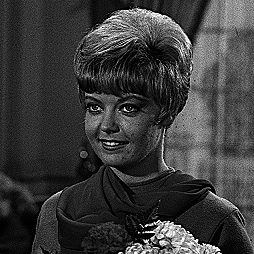

In [4]:
def convolution2d(image, kernel, stride, padding): #melakukan konvolusi 2D pada citra/grayscale, Parameter stride digunakan untuk menentukan seberapa besar "langkah" ketika meletakkan kernel di atas gambar, dan padding digunakan untuk mengatur jenis padding (zero padding) yang digunakan selama operasi konvolusi.
#Padding adalah cara menambahkan piksel di sekitar gambar
    image_height, image_width = image.shape #mengambil dimensi dari gambar yang akan diolah.
#fungsi shape, mendapatkan tuple yang berisi dimensi gambar, dan elemen pertama tuple adalah tinggi gambar,sedangkan elemen kedua adalah lebar gambar
    kernel_height, kernel_width = kernel.shape #mengambil dimensi dari kernel yang akan digunakan untuk konvolusi.
    result_height = image_height - kernel_height + 1 ##menghitung tinggi dari hasil matriks konvolusi. Ini dilakukan dengan mengurangkan tinggi kernel dari tinggi gambar dan menambahkan 1
    result_width = image_width - kernel_width + 1 #menghitung lebar dari hasil matriks konvolusi.

    result = np.zeros((result_height, result_width), dtype=np.float32)
#membuat matriks nol dengan ukuran yang telah dihitung sebelumnya

    for x in range(result_width): #mengatur posisi kernel di atas gambar. x dan y adalah koordinat titik tengah kernel pada gambar.
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):#mengalikan setiap elemen kernel dengan piksel yang sesuai pada gambar, dan kemudian menjumlahkan hasilnya untuk menghitung nilai konvolusi pada titik tertentu dalam hasil gambar.
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z #menyimpan hasil konvolusi pada koordinat (x, y)

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk sharpen
#Kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk mengubah atau memproses citra.
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#nilai 5 yaitu bobot tertinggi,memberikan kontribusi paling besar pada piksel tengah yang sedang dihitung dalam operasi konvolusi, piksel lebih terang.
#nilai -1 bobot negatif, yang memberikan kontribusi negatif pada piksel tetangga.piksel lebih gelap
#Nilai 0 adalah bobot nol dan tidak memberikan kontribusi pada piksel tengah atau tetangga.

# Menjalankan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen,1,2)
#nilai 1 mengindikasikan bahwa kernel akan bergeser satu piksel setiap kali.
#Nilai 2(parameter padding) mengindikasikan bahwa zero-padding akan digunakan. Zero-padding menambahkan piksel-piksel nol di sekeliling gambar sehingga hasil konvolusi memiliki ukuran yang sama dengan gambar asli.

# Menampilkan hasil konvolusi
print('Operasi Sharpen')
print('---------------------------------')
cv2_imshow(sharpened_image)

# **PRAKTIKUM 2 - Emboss**

Operasi Emboss
---------------------------------


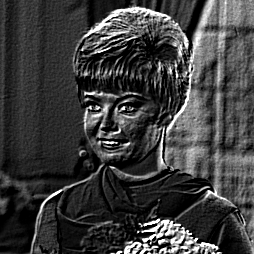

In [6]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1

    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Emboss
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
#Nilai -2 adalah bobot tertinggi dan akan memberikan kontribusi paling besar pada piksel tengah yang sedang dihitung dalam operasi konvolusi.piksel lebih gelap.
#Nilai 2 adalah bobot tertinggi positif, yang akan memberikan kontribusi terbesar pada piksel tetangga yang lebih gelap.

# Menjalankan konvolusi
embossed_image = convolution2d(img_gray, kernel_emboss,1,2)
#digunakan untuk menciptakan efek tiga dimensi pada gambar denga

# Menampilkan hasil konvolusi
print('Operasi Emboss')
print('---------------------------------')
cv2_imshow(embossed_image)

# **PRAKTIKUM 3 - SOBEL EDGE DETECTION**

Left Sobel Edge Detection
---------------------------------


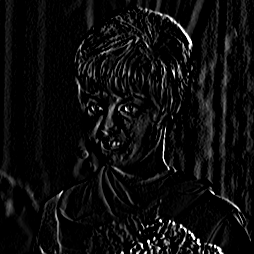

In [7]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Left Sobel Edge Detection
kernel_left_sobel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_left_sobel,1,2)

# Menampilkan hasil konvolusi
print('Left Sobel Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)


# **Praktikum 4**

Canny Edge Detection
---------------------------------


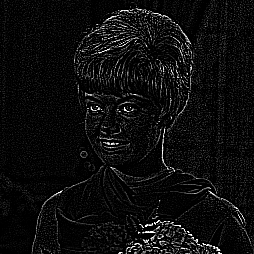

In [8]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Canny Edge Detection
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_canny, 1, 2)

# Menampilkan hasil konvolusi
print('Canny Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)

# **PRAKTIKUM 5**

Prewitt Edge Detection
---------------------------------


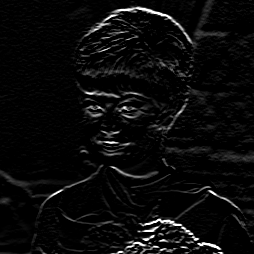

In [9]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_prewitt, 1, 2)

# Menampilkan hasil konvolusi
print('Prewitt Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)

# **PRAKTIKUM 6**

5x5 Gaussian Blur
---------------------------------


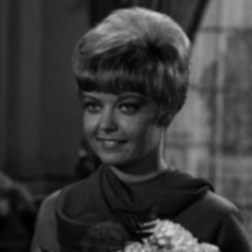

In [10]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk 5x5 Gaussian Blur
kernel_gaussian_blur = (1/256) * np.array([[1, 4, 6, 4, 1],
                                           [4, 16, 24, 16, 4],
                                           [6, 24, 36, 24, 6],
                                           [4, 16, 24, 16, 4],
                                           [1, 4, 6, 4, 1]])

# Menjalankan konvolusi
blurred_image = convolution2d(img_gray, kernel_gaussian_blur, 1, 2)

# Menampilkan hasil konvolusi
print('5x5 Gaussian Blur')
print('---------------------------------')
cv2_imshow(blurred_image)

# **PRAKTIKUM 7**

21x21 Gaussian Blur
---------------------------------


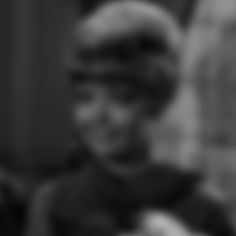

In [11]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan ukuran kernel dan sigma
kernel_size = 21
sigma = math.sqrt(kernel_size)

# Membuat kernel Gaussian dengan OpenCV
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

# Menjalankan konvolusi
blurred_image = convolution2d(img_gray, gauss_kernel, 1, 2)

# Menampilkan hasil konvolusi
print('21x21 Gaussian Blur')
print('---------------------------------')
cv2_imshow(blurred_image)

# **TUGAS**

ktp.jpg
---------------------------------


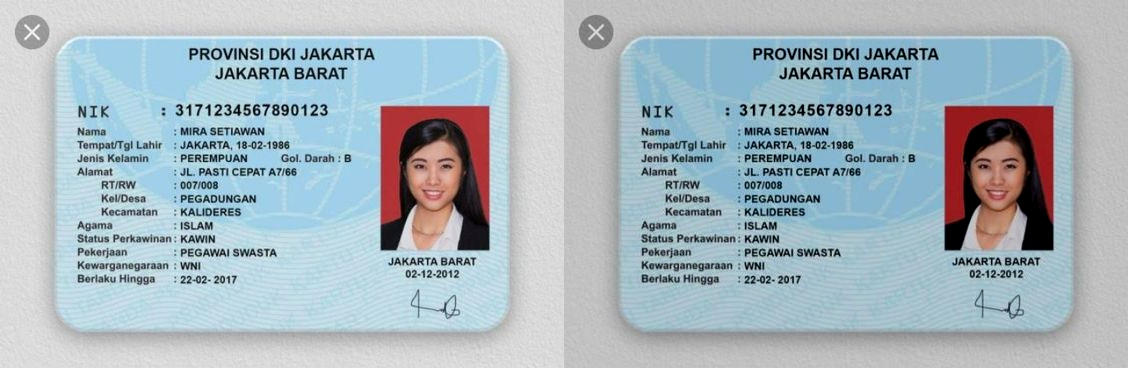

In [21]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

def hist_equ (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_image = cv.merge(eq_channels)

  return eq_image

def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]
  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

result_brightness = Brightness(ktp, -25)

result = conv2d(result_brightness, gauss_kernel,1)

final_frame = cv.hconcat((ktp, result))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)


ktp.jpg
---------------------------------


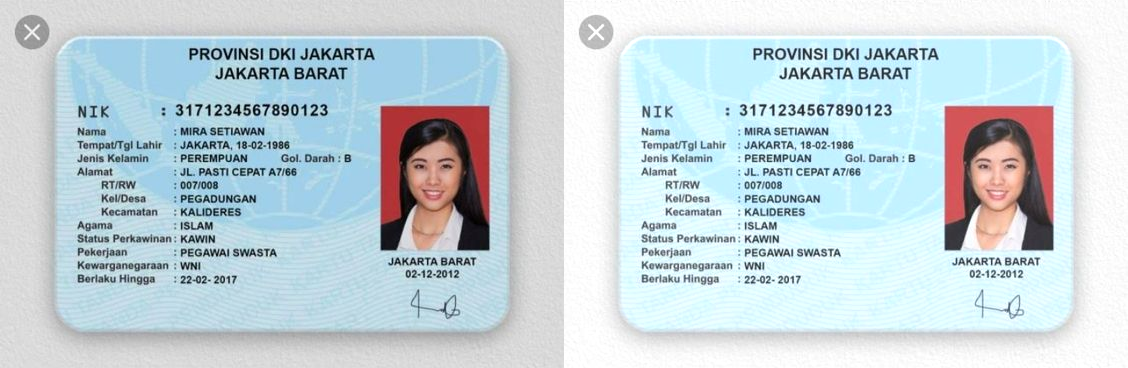

In [18]:
## KTP1.png
ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')
result = conv2d(ktp, kernel_sharpen,1)
brightness = Brightness(result, 35)
final_frame = cv.hconcat((ktp, brightness))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)

ktp.jpg
---------------------------------


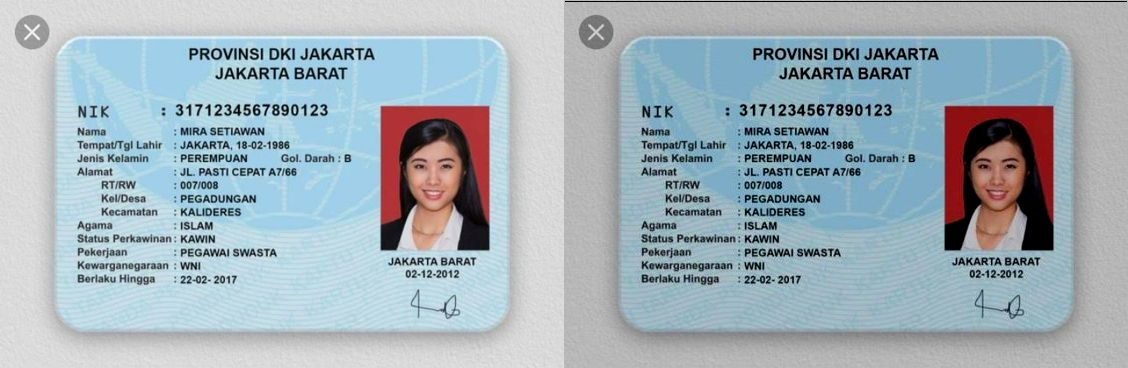

In [17]:

## KTP2.png
ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

result = conv2d(ktp, kernel_lsed,1)
brightness = Brightness(result, -35)
final_frame = cv.hconcat((ktp, brightness))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)

ktp.jpg
---------------------------------


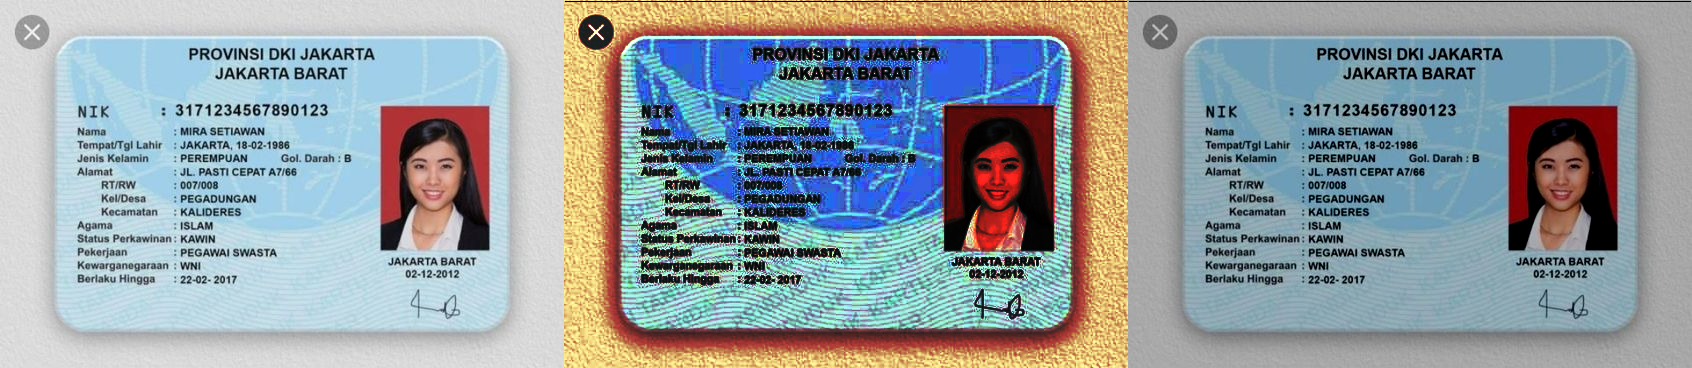

In [16]:
## KTP3.png
ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

kernel_ped = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]], dtype=np.float32)

result = conv2d(ktp, kernel_ped,1)
hist = hist_equ(result)
brightness = Brightness(result, -50)
final_frame = cv.hconcat((ktp, hist, brightness))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)


ktp.jpg
---------------------------------


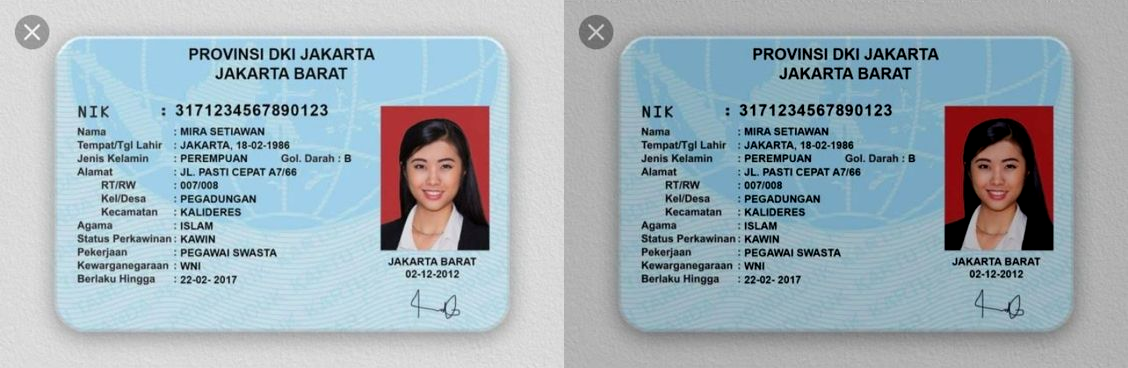

In [19]:
ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]], dtype=np.float32)

result = conv2d(ktp, kernel_sharpen, 1)
brightness = Brightness(result, -40)
final_frame = cv.hconcat((ktp, brightness))

print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)

ktp.jpg
---------------------------------


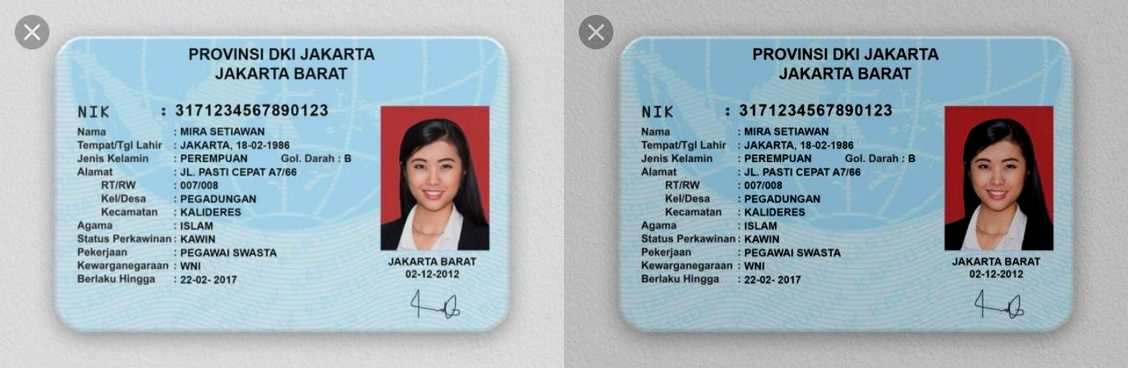

In [22]:

ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

result = conv2d(ktp, gauss_kernel,1)
brightness = Brightness(result, -30)
final_frame = cv.hconcat((ktp, brightness))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)

ktp.jpg
---------------------------------


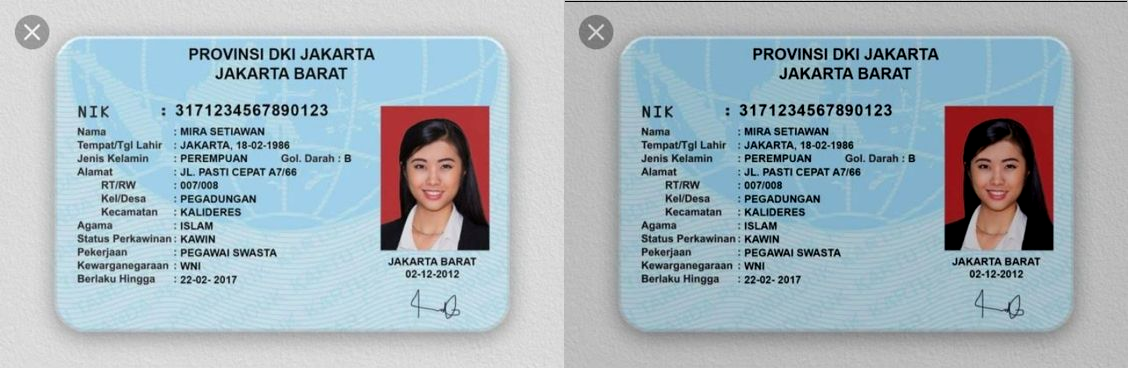

In [23]:

ktp = cv.imread('/content/drive/MyDrive/images/ktp.jpg')

result = conv2d(ktp, kernel_lsed,1)
brightness = Brightness(result, -30)
final_frame = cv.hconcat((ktp, brightness))
print('ktp.jpg')
print('---------------------------------')
cv2_imshow(final_frame)
